In [4]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plot
import seaborn as seaborn_plot

In [5]:
# Load the dataset
# The dataset contains student performance data, including grades and study habits.
file_path = r"C:\Users\Rutvik Suryawanshi\Downloads\student\student-mat.csv"
data_frame = pandas.read_csv(file_path, delimiter=";")

In [6]:
display(data_frame.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
# Checking for missing values to ensure data integrity
# This helps us identify if any data is incomplete
print("\nMissing Values:\n", data_frame.isnull().sum())


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
# Displaying data types to understand the structure of each column
# Helps determine whether numerical, categorical, or textual data is present
print("\nData Types:\n", data_frame.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [9]:
# Checking the dataset's shape (number of rows and columns)
# Useful for understanding dataset size
print("\nDataset Shape:", data_frame.shape)


Dataset Shape: (395, 33)


In [10]:
# Handling missing values by replacing them with the median of respective columns
# Median is chosen as it is less affected by extreme values
if data_frame.isnull().sum().sum() > 0:
    data_frame.fillna(data_frame.median(numeric_only=True), inplace=True)

In [11]:
# Removing duplicate entries to avoid redundant data
# Ensures data accuracy by eliminating repeated records
data_frame.drop_duplicates(inplace=True)

In [12]:
# 1. Calculate the average final grade (G3)
# Helps understand overall student performance
average_G3 = data_frame['G3'].mean()
print("\nAverage Final Grade (G3):", average_G3)


Average Final Grade (G3): 10.415189873417722


In [13]:
# 2. Count the number of students who scored above 15 in their final grade (G3)
# This indicates the number of high-achieving students
students_above_15 = data_frame[data_frame['G3'] > 15].shape[0]
print("\nNumber of Students Scoring Above 15 in G3:", students_above_15)


Number of Students Scoring Above 15 in G3: 40


In [14]:
# 3. Determine the correlation between study time and the final grade
# This helps analyze if study habits impact performance
correlation = data_frame[['studytime', 'G3']].corr().iloc[0, 1]
print("\nCorrelation between Study Time and Final Grade:", correlation)


Correlation between Study Time and Final Grade: 0.09781968965319622


In [15]:
# 4. Compare the average final grade (G3) between genders
# This helps identify any gender-based performance differences
average_G3_by_gender = data_frame.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:\n", average_G3_by_gender)


Average Final Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


C:\Users\Rutvik Suryawanshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


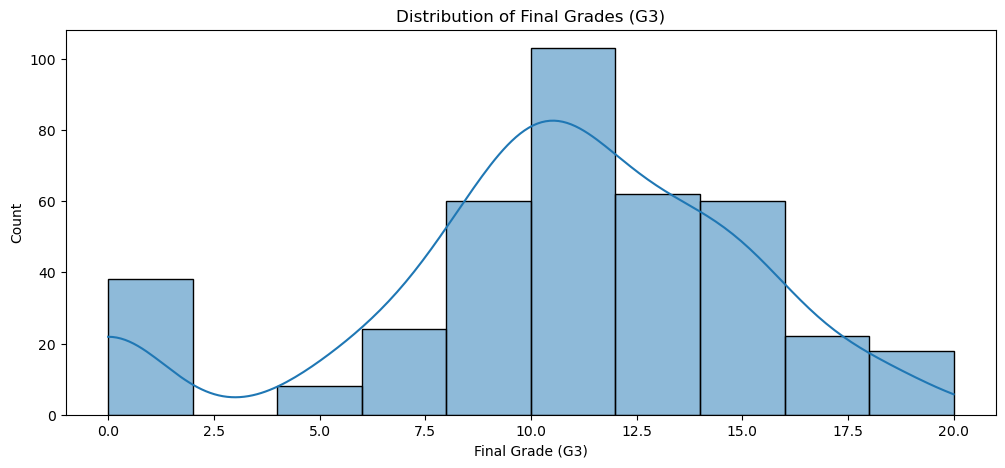

In [16]:
# Histogram to visualize the distribution of final grades (G3)
# Shows how grades are spread across students
plot.figure(figsize=(12, 5))
seaborn_plot.histplot(data_frame['G3'], bins=10, kde=True)
plot.title("Distribution of Final Grades (G3)")
plot.xlabel("Final Grade (G3)")
plot.ylabel("Count")
plot.show()

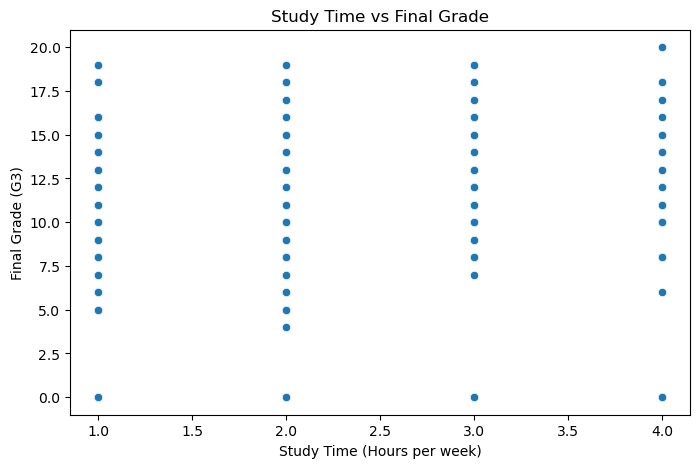

In [17]:
# Scatter plot to visualize the relationship between study time and final grade
# Helps determine if more study time results in better grades
plot.figure(figsize=(8, 5))
seaborn_plot.scatterplot(x=data_frame['studytime'], y=data_frame['G3'])
plot.title("Study Time vs Final Grade")
plot.xlabel("Study Time (Hours per week)")
plot.ylabel("Final Grade (G3)")
plot.show()

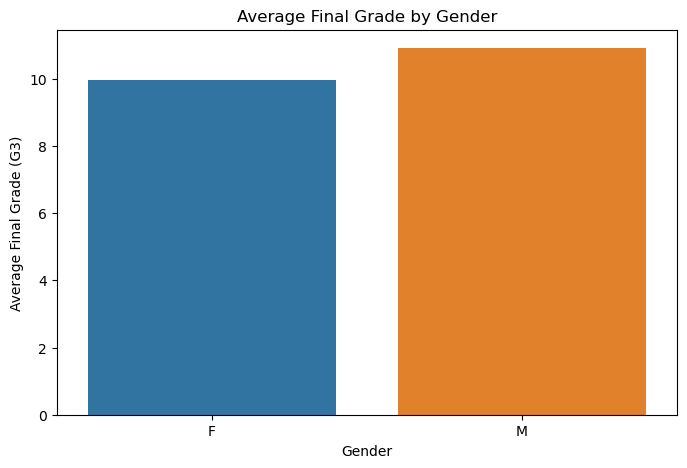

In [18]:
# Bar chart to compare the average final grade between male and female students
# Highlights any gender differences in academic performance
plot.figure(figsize=(8, 5))
seaborn_plot.barplot(x=average_G3_by_gender.index, y=average_G3_by_gender.values)
plot.title("Average Final Grade by Gender")
plot.xlabel("Gender")
plot.ylabel("Average Final Grade (G3)")
plot.show()